In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

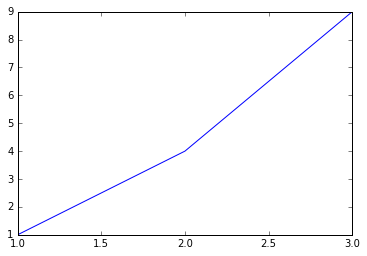

In [3]:
plt.plot([1,2,3], [1,4,9])
plt.show()

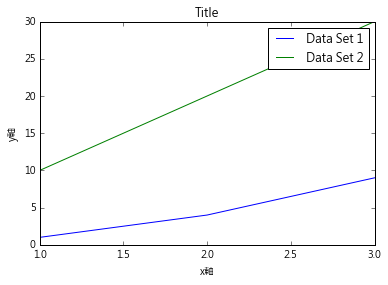

In [7]:
matplotlib.rc('font', **{'family':'Microsoft JhengHei'})
plt.xlabel(u'x軸')
plt.ylabel(u'y軸')
plt.title('Title')
plt.plot([1,2,3], [1,4,9])
plt.plot([1,2,3], [10,20,30])
plt.legend(['Data Set 1','Data Set 2'])
# plt.legend() takes a list as an argment
plt.show()

## Using Pandas

In [8]:
import pandas as pd

In [9]:
data = { 'year':[2008 , 2012, 2016],
       'attendees':[112 , 321, 729],
       'average age':[24, 43, 31]}
df = pd.DataFrame(data)

In [15]:
df

,attendees,average age,year
0,112,24,2008
1,321,43,2012
2,729,31,2016


In [11]:
df['year'] < 2013

0     True
1     True
2    False
Name: year, dtype: bool

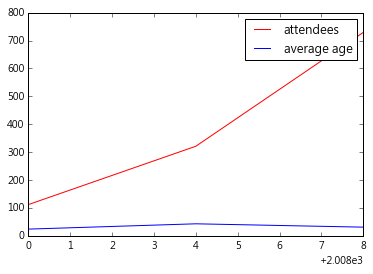

In [22]:
plt.plot(df['year'], df['attendees'], c='r')
plt.plot(df['year'], df['average age'])
plt.legend(['attendees','average age'])
plt.show()

In [24]:
df.shape
present_year = df.set_index('year')

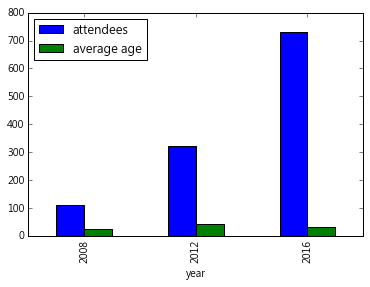

In [25]:
present_year.plot(kind='bar')
plt.show()

## Importing Data with Pandas

In [26]:
data = pd.read_csv('../data/countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


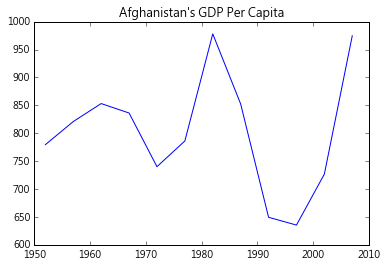

In [27]:
afghanistan = data[data.country == 'Afghanistan']
plt.plot(afghanistan.year, afghanistan.gdpPerCapita)
plt.title("Afghanistan's GDP Per Capita")
plt.show()

## problem: Comparing Asia and Europe's GDP Per Capita in 2007

In [30]:
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [31]:
# 看看有幾洲
set(data.continent)

{'Africa', 'Americas', 'Asia', 'Europe', 'Oceania'}

In [32]:
# 只看 2007
data_2007 = data[data.year == 2007]
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [35]:
# 只看 Asia 與 Europe 的比較
asia_2007 = data_2007[data_2007.continent == 'Asia']
europe_2007 = data_2007[data_2007.continent == 'Europe']
europe_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
23,Albania,Europe,2007,76.423,3600523,5937.029526
83,Austria,Europe,2007,79.829,8199783,36126.492700
119,Belgium,Europe,2007,79.441,10392226,33692.605080
155,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803
191,Bulgaria,Europe,2007,73.005,7322858,10680.792820


In [36]:
set(asia_2007.country)

{'Afghanistan',
 'Bahrain',
 'Bangladesh',
 'Cambodia',
 'China',
 'Hong Kong, China',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Israel',
 'Japan',
 'Jordan',
 'Korea, Dem. Rep.',
 'Korea, Rep.',
 'Kuwait',
 'Lebanon',
 'Malaysia',
 'Mongolia',
 'Myanmar',
 'Nepal',
 'Oman',
 'Pakistan',
 'Philippines',
 'Saudi Arabia',
 'Singapore',
 'Sri Lanka',
 'Syria',
 'Taiwan',
 'Thailand',
 'Vietnam',
 'West Bank and Gaza',
 'Yemen, Rep.'}

In [42]:
print 'Asia Mean GDP:' , asia_2007.gdpPerCapita.mean()
print 'Asia Median GDP:' , asia_2007.gdpPerCapita.median()
print 'Europe Mean GDP:' , europe_2007.gdpPerCapita.mean()
print 'Europe Median GDP:' , europe_2007.gdpPerCapita.median()
print '台灣GDP:', asia_2007[asia_2007.country == 'Taiwan'].gdpPerCapita

 Asia Mean GDP: 12473.0268701
Asia Median GDP: 4471.061906
Europe Mean GDP: 25054.4816359
Europe Median GDP: 28054.06579
台灣GDP: 1511    28718.27684
Name: gdpPerCapita, dtype: float64


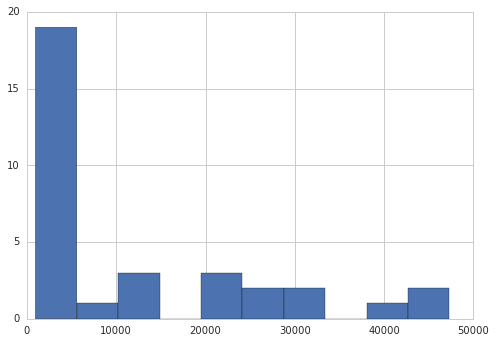

In [53]:
plt.hist(asia_2007.gdpPerCapita, edgecolor='black')
plt.show()

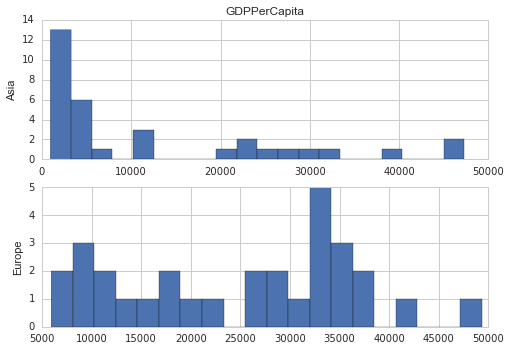

In [56]:
plt.subplot(2, 1, 1)
plt.title('GDPPerCapita')
plt.hist(asia_2007.gdpPerCapita, 20, edgecolor='black')
plt.ylabel('Asia')
plt.subplot(2, 1, 2)
plt.ylabel('Europe')
plt.hist(europe_2007.gdpPerCapita, 20, edgecolor='black')
plt.show()

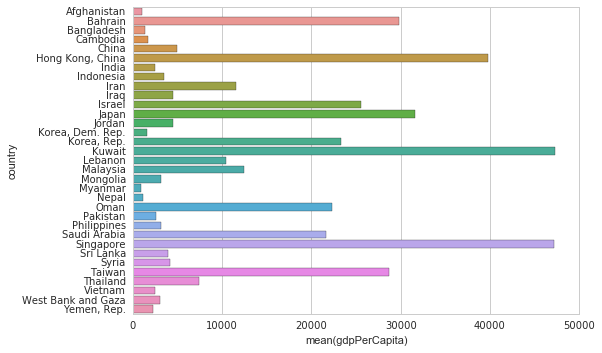

In [100]:
# 記得先 run 下面的 seaborn lib
sns.despine(left=True, bottom=True)
sns.barplot(y="country", x="gdpPerCapita", data=asia_2007);


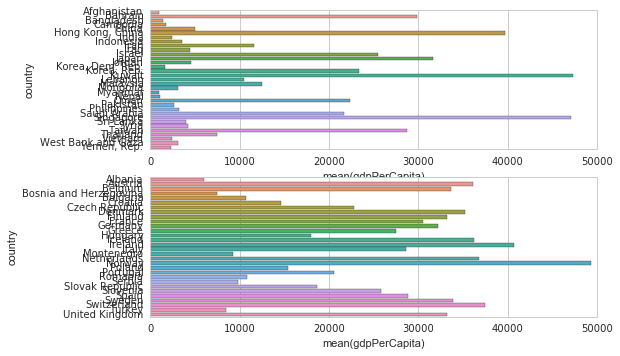

In [108]:
# 使用 seaborn 繪 subplot
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
# Tell pointplot to plot on ax1 with the ax argument

sns.barplot(y="country", x="gdpPerCapita", data=asia_2007, ax=ax1);
sns.barplot(y="country", x="gdpPerCapita", data=europe_2007, ax=ax2);

# Close the FacetGrid figure which we don't need (g.fig)
plt.close(g.fig)

plt.show()

## seaborn Practice

In [44]:
import seaborn as sns
import numpy as np
sns.set(style="whitegrid", color_codes=True)

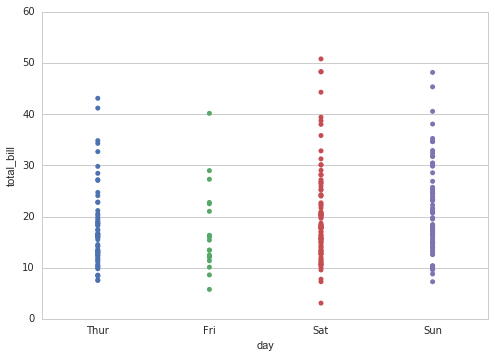

In [45]:
np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
sns.stripplot(x="day", y="total_bill", data=tips);

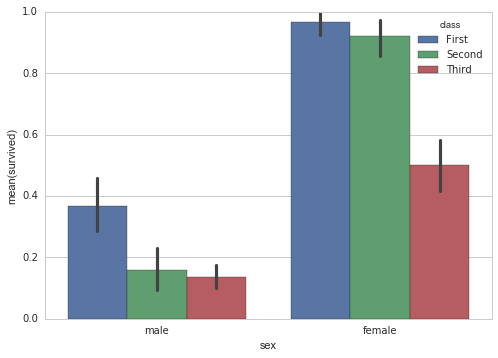

In [46]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

## Line Charts
### Problem: Comparing GDP Per Capita Growth in the U.S. and China

In [114]:
us = data[data.country == 'United States']
china = data[data.country == 'China']
us.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
1608,United States,Americas,1952,68.44,157553000,13990.48208
1609,United States,Americas,1957,69.49,171984000,14847.12712
1610,United States,Americas,1962,70.21,186538000,16173.14586
1611,United States,Americas,1967,70.76,198712000,19530.36557
1612,United States,Americas,1972,71.34,209896000,21806.03594


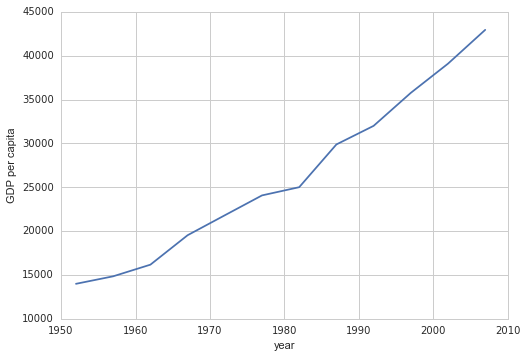

In [115]:
plt.plot(us.year, us.gdpPerCapita)
plt.ylabel('GDP per capita')
plt.xlabel('year')
plt.show()

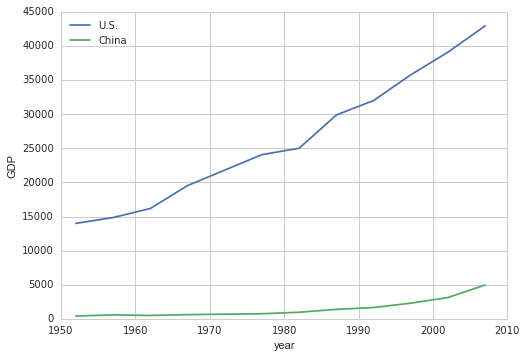

In [118]:
plt.plot(us.year, us.gdpPerCapita, label='U.S.')
plt.plot(china.year, china.gdpPerCapita, label='China')
plt.ylabel('GDP')
plt.xlabel('year')
plt.legend(loc="upper left")
plt.show()

In [119]:
#Pandas 透過使用中括號 [] 與 .iloc 可以很靈活地從 data frame 中選擇想要的元素。
# ex : df.iloc[0:1, 1]) # 第一列第二欄
us.gdpPerCapita.iloc[0]

13990.482080000002

In [123]:
# 以第一筆資料作為起始點, 來看每年的成長比率
us_growth = us.gdpPerCapita / us.gdpPerCapita.iloc[0] * 100
china_growth = china.gdpPerCapita / china.gdpPerCapita.iloc[0] * 100

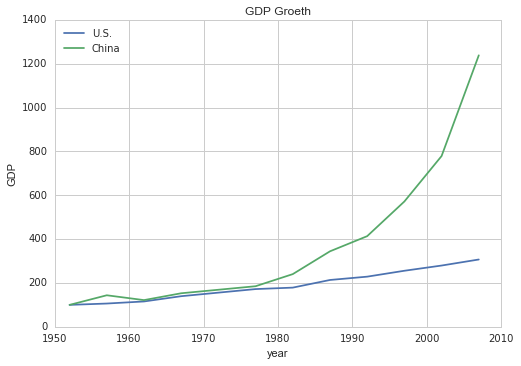

In [124]:
plt.plot(us.year, us_growth, label='U.S.')
plt.plot(china.year, china_growth, label='China')
plt.title('GDP Groeth')
plt.ylabel('GDP')
plt.xlabel('year')
plt.legend(loc="upper left")
plt.show()

In [ ]:
### Problem: Comparing Population Growth in the U.S. and China